In [1]:
import pandas as pd
import cytview.cytview as cv
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("example/experiment.csv")
df.head()

,ImageNumber,ObjectNumber,Metadata_Well,Measurement_1,Measurement_2
0,1,1,A04,0.008475,0.169154
1,1,2,A04,0.010526,0.114011
2,1,3,A04,0.006295,0.052348
3,1,4,A04,0.006414,0.006516
4,1,5,A04,0.005213,0.059943


Sample 1 vs Sample 2 : p value:  0.006862  ( ** )
Sample 2 vs Sample 3 : p value:  0.014596  ( * )


,Sample 1,Sample 2,Sample 3
count,1000.000000,1000.000000,1000.000000
mean,0.007525,0.005879,0.007020
std,0.001407,0.000959,0.001243
min,0.003950,0.002672,0.004081
25%,0.006568,0.005243,0.006163
50%,0.007443,0.005809,0.006853
75%,0.008321,0.006392,0.007709
max,0.016888,0.011515,0.016209


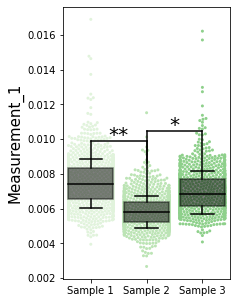

In [3]:
plt.figure(figsize=[3,5])


measurment="Measurement_1"
identifier="Metadata_Well"
y_label="Measurement"

groupings =  [["A04", "A05", "A06"],
              ["C04", "C05", "C06"],
              ["E04", "E05", "E06"]]

labels = ["Sample 1", "Sample 2", "Sample 3"]
compare = [[0,1],[1,2]]

cv.group_plot(dataframe=df, measurment=measurment, identifier=identifier, 
               groupings=groupings, labels = labels, color="Greens", 
               compare=compare, draw=True)

KeyboardInterrupt: 

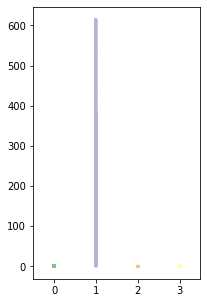

In [4]:
plt.figure(figsize=[3,5])

cv.cell_plot(df, "Metadata_Well", "Measurement_1")